In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
matplotlib.rcParams['figure.dpi'] = 140

schooldata = pd.read_csv("./schooldata.csv")
schooldata["CLASS"] = schooldata["CLASS"].astype("object")
schooldata.head()

,SCHOOL,CLASS,CHILD,COMBI,SIZE,SSES,GIRL,MINORITY,SITTERS,CSES,IQV,IQP,PRE_LANG,POST_LANG,PRE_ARITH,POST_ARITH,diff_a
0,1,180,1,0.0,29.0,11.0,1.0,1,0.0,10.0,10.5,7.333333,33.0,NaN,10.0,12.0,2.0
1,1,180,2,0.0,29.0,11.0,1.0,1,0.0,NaN,14.0,14.333333,44.0,50.0,18.0,30.0,12.0
2,1,180,3,0.0,29.0,11.0,0.0,0,0.0,23.0,15.0,12.330000,36.0,46.0,14.0,24.0,10.0
3,1,180,4,0.0,29.0,11.0,0.0,1,0.0,10.0,14.5,10.000000,36.0,45.0,12.0,19.0,7.0
4,1,180,5,0.0,29.0,11.0,0.0,0,0.0,15.0,9.5,11.000000,33.0,33.0,10.0,24.0,14.0


# Distribution of diff_a by class

We can easily see that there are differences between classes.

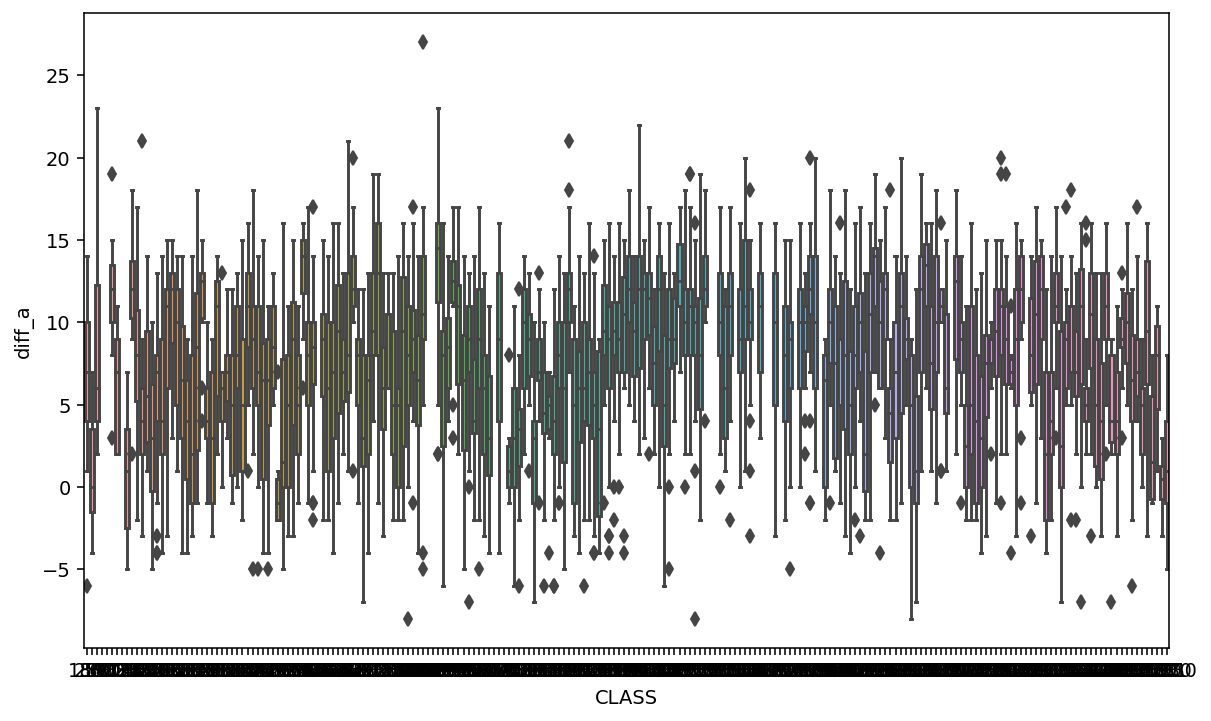

In [65]:
# plt.figure(dpi=120)
sns.boxplot(x="CLASS", y="diff_a", data=schooldata)
plt.show()

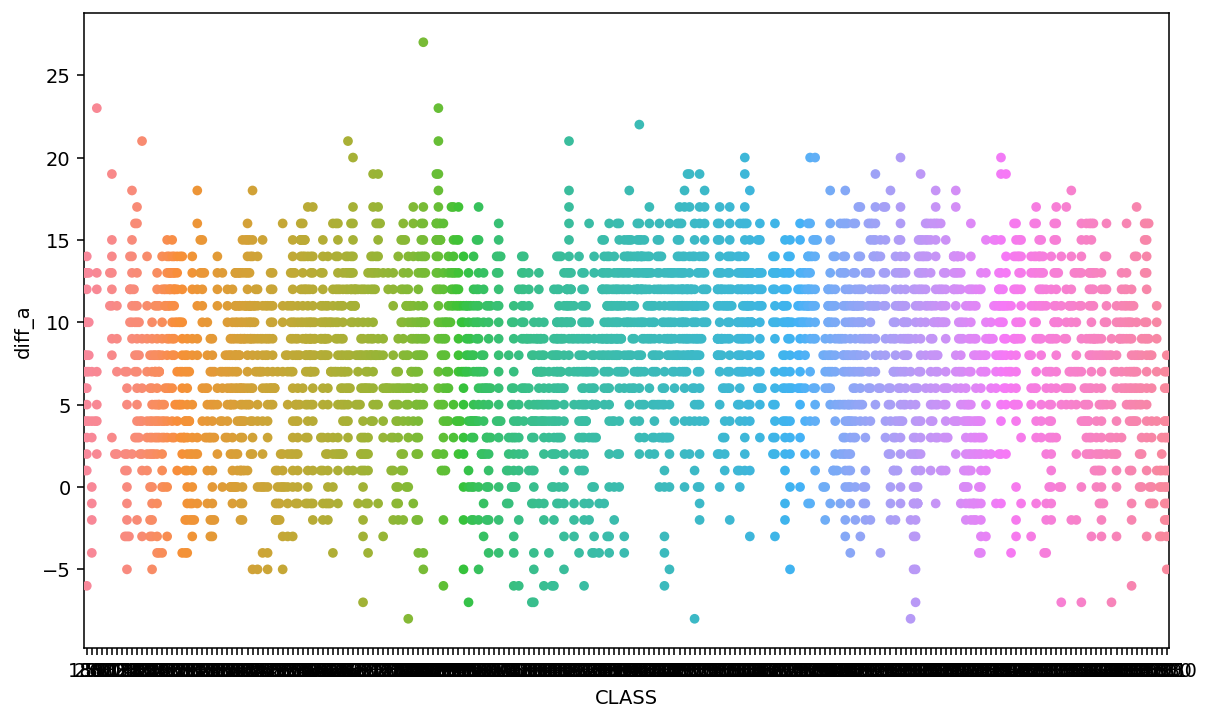

In [66]:
import warnings
warnings.filterwarnings("ignore")

sns.swarmplot(x="CLASS", y="diff_a", data=schooldata)
plt.show()

# One Way ANOVA

In [67]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.formula.api import ols, gls

## Ordinary Least Squares (OLS)

In [68]:
model = ols("diff_a ~ C(CLASS)", data=schooldata).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(CLASS),30395.667810,215.0,6.994242,8.937852e-141
Residual,68825.552866,3405.0,NaN,NaN


## Generalised Least Squares (GLS)

In [69]:
model = gls("diff_a ~ C(CLASS)", data=schooldata).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
anova_table

,sum_sq,df,F,PR(>F)
C(CLASS),30395.667810,215.0,6.994242,8.937852e-141
Residual,68825.552866,3405.0,NaN,NaN


## ANOVA Using bioinfokit

In [70]:
from bioinfokit.analys import stat
res = stat()
res.anova_stat(df=schooldata, res_var="diff_a", anova_model="diff_a ~ C(CLASS)")
res.anova_summary

,df,sum_sq,mean_sq,F,PR(>F)
C(CLASS),215.0,30395.667810,141.375199,6.994242,8.937852e-141
Residual,3405.0,68825.552866,20.213085,NaN,NaN


# Interpretation

The $p$ value produced from the ANOVA analysis is significant ($p < 0.05$). Thus, we reject the null hypothesis and conclude that there are significant differences among classes.

> Note: from ANOVA we know that the classes performed differently, but we are not able to tell which classes are significantly different from each other. To know the pairs of significant different classes, we could perform multiple pairwise comparison (post hoc comparison) analysis for all unplanned comparison using Tukey’s honestly significantly differenced (HSD) test.

# Testing ANOVA Assumptions

- ANOVA assumptions can be checked using test statistics (e.g. Shapiro-Wilk, Bartlett’s, Levene’s test, Brown-Forsythe test) and the visual approaches such as residual plots (e.g. QQ-plots) and histograms.

- The visual approaches perform better than statistical tests. For example, the Shapiro-Wilk test has low power for small sample size data and deviates significantly from normality for large sample sizes (say n > 50). For large sample sizes, you should consider to use QQ-plot for normality assumption.

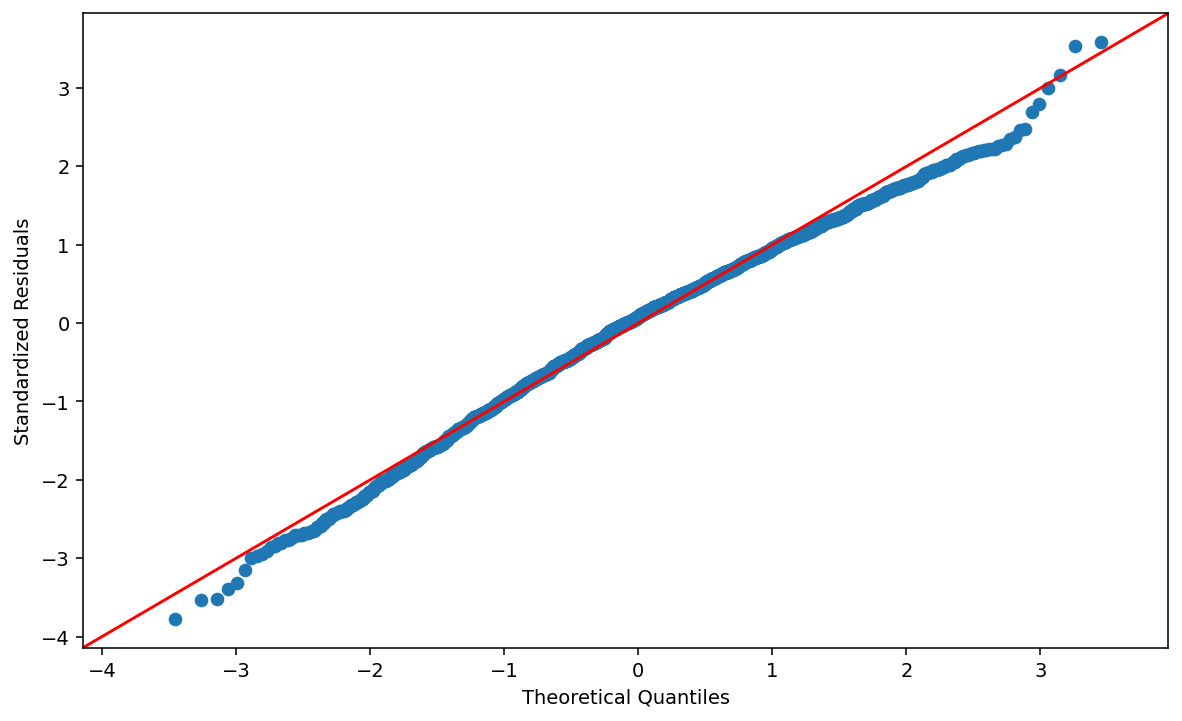

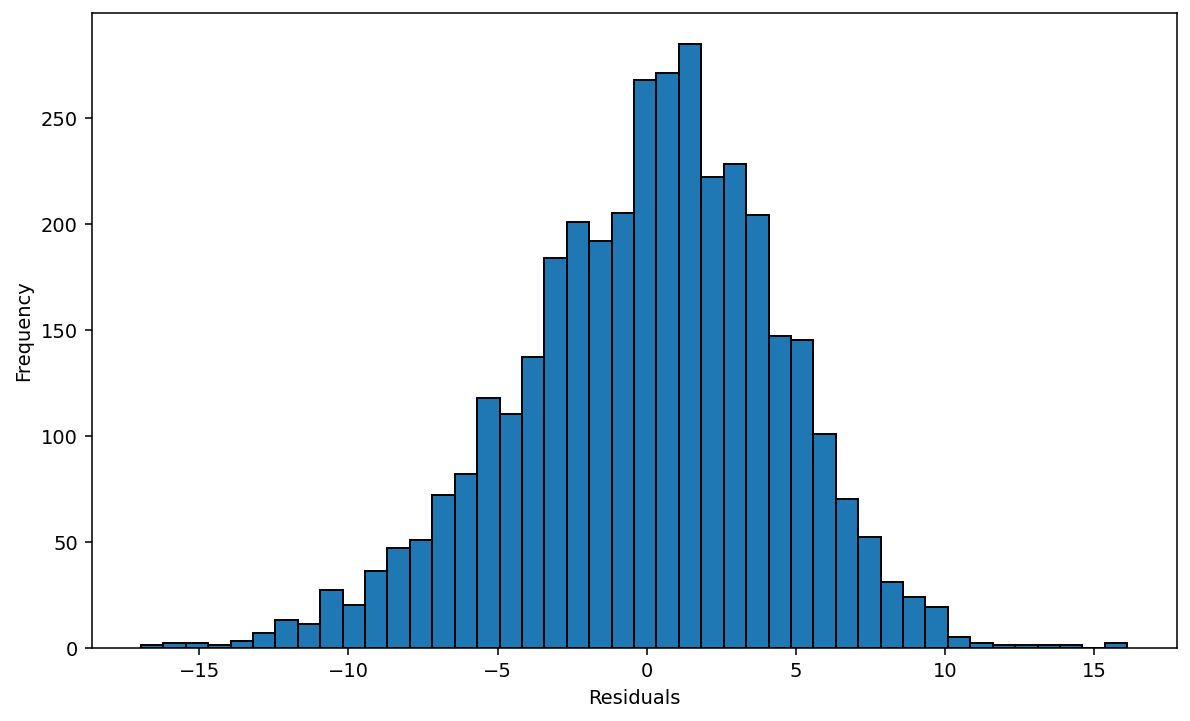

In [74]:
sm.qqplot(res.anova_std_residuals, line="45")
plt.xlabel("Theoretical Quantiles")
plt.ylabel("Standardized Residuals")
plt.show()

plt.hist(res.anova_model_out.resid, bins="auto", histtype="bar", ec="k")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

# Interpretation

- As the standardized residuals lie around the 45-degree line, it suggests that the **residuals are approximately normally distributed**

- In the histogram, the distribution looks approximately normal and suggests that residuals are approximately normally distributed

# Shapiro-Wilk test

Shapiro-Wilk test can be used to check the normal distribution of residuals. Null hypothesis: data is drawn from normal distribution.

In [75]:
stats.shapiro(model.resid)

ShapiroResult(statistic=0.9925176501274109, pvalue=8.871838268371957e-13)

# Intepretation

$p$-value is non significant ($p > 0.05$), hence we fail to reject the null hypothesis and conclude that data is drawn from normal distribution.

# Reference

[1] https://www.reneshbedre.com/blog/anova.html